<a href="https://colab.research.google.com/github/Nasif17/RESEARCH-/blob/main/real_state_and_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [ ]:
real_state_house_price_dataframe = pd.read_csv("house_price_bd.csv")

In [ ]:
print(real_state_house_price_dataframe)

                                                  Title  Bedrooms  Bathrooms  \
0     We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1     Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2     1370 square feet apartment is ready to sale in...       3.0        3.0   
3     2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4     Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   
...                                                 ...       ...        ...   
3860  Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...       3.0        3.0   
3861  Properly Designed This 1000 Square Feet Apartm...       2.0        2.0   
3862  1240 Sq Ft Flat For Sale Is Awaiting You In Ga...       3.0        3.0   
3863  An Apartment Of 1300 Sq Ft Is Up For Sale In J...       3.0        3.0   
3864  1350 Sq Ft Residential Apartment For Sale In G...       3.0        3.0   

     Floor_no Occupancy_status  Floor_a

In [ ]:
print(real_state_house_price_dataframe.head())

                                               Title  Bedrooms  Bathrooms  \
0  We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1  Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2  1370 square feet apartment is ready to sale in...       3.0        3.0   
3  2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4  Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   

  Floor_no Occupancy_status  Floor_area   City Price_in_taka  \
0        3           vacant      1960.0  dhaka   ৳39,000,000   
1        1           vacant      1705.0  dhaka   ৳16,900,000   
2        6           vacant      1370.0  dhaka   ৳12,500,000   
3        4           vacant      2125.0  dhaka   ৳20,000,000   
4        4           vacant      2687.0  dhaka   ৳47,500,000   

                      Location  
0           Gulshan 1, Gulshan  
1  Lake Circus Road, Kalabagan  
2         Shukrabad, Dhanmondi  
3     Block L, Bashu

In [ ]:
real_state_house_price_dataframe.shape

(3865, 9)

In [ ]:
real_state_house_price_dataframe.isnull().sum()

,0
Title,0
Bedrooms,1001
Bathrooms,1001
Floor_no,684
Occupancy_status,99
Floor_area,99
City,0
Price_in_taka,0
Location,6


In [ ]:
real_state_house_price_dataframe.describe

<bound method NDFrame.describe of                                                   Title  Bedrooms  Bathrooms  \
0     We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1     Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2     1370 square feet apartment is ready to sale in...       3.0        3.0   
3     2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4     Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   
...                                                 ...       ...        ...   
3860  Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...       3.0        3.0   
3861  Properly Designed This 1000 Square Feet Apartm...       2.0        2.0   
3862  1240 Sq Ft Flat For Sale Is Awaiting You In Ga...       3.0        3.0   
3863  An Apartment Of 1300 Sq Ft Is Up For Sale In J...       3.0        3.0   
3864  1350 Sq Ft Residential Apartment For Sale In G...       3.0        3.0   

     Floor_no Occupancy_status  Floor_area     City Price_in_taka  \
0           3           vacant      1960.0    dhaka   ৳39,000,000   
1           1           vacant      1705.0    dhaka   ৳16,900,000   
2           6           vacant      1370.0    dhaka   ৳12,500,000   
3           4           vacant      2125.0    dhaka   ৳20,000,000   
4           4           vacant      2687.0    dhaka   ৳47,500,000   
...       ...              ...         ...      ...           ...   
3860        8           vacant      1350.0  gazipur    ৳4,500,000   
3861        7           vacant      1000.0  gazipur    ৳4,300,000   
3862        9           vacant      1240.0  gazipur    ৳4,960,000   
3863        9           vacant      1300.0  gazipur    ৳5,200,000   
3864        8           vacant      1350.0  gazipur    ৳4,500,000   

                              Location  
0                   Gulshan 1, Gulshan  
1          Lake Circus Road, Kalabagan  
2                 Shukrabad, Dhanmondi  
3             Block L, Bashundhara R-A  
4                   Road No 25, Banani  
...                                ...  
3860  Joydebpur, Gazipur Sadar Upazila  
3861   Chandana, Gazipur Sadar Upazila  
3862  Joydebpur, Gazipur Sadar Upazila  
3863  Joydebpur, Gazipur Sadar Upazila  
3864  Joydebpur, Gazipur Sadar Upazila  

[3865 rows x 9 columns]>

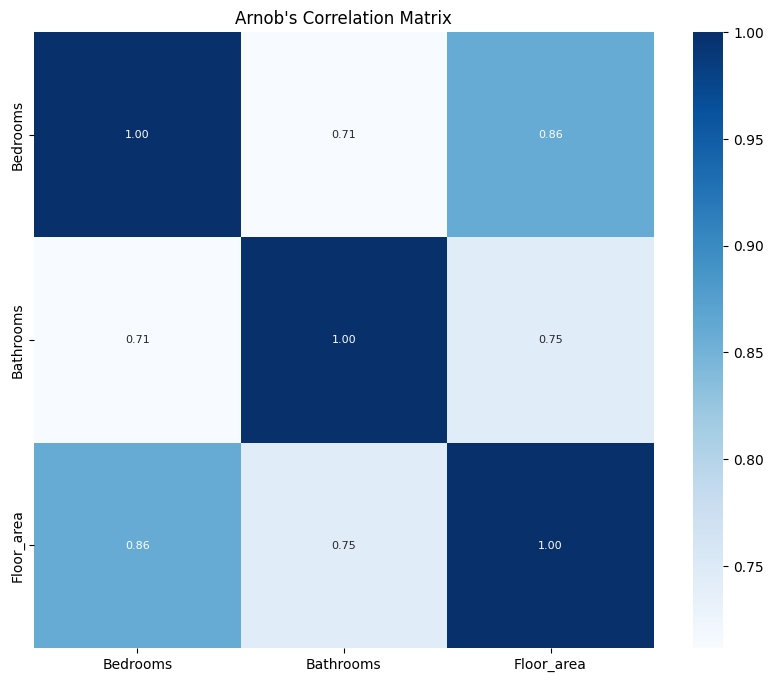

In [ ]:
# Select only numeric columns
numeric_df = real_state_house_price_dataframe.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Blues',annot=True, annot_kws={'size':8}, fmt='.2f')
plt.title("Arnob's Correlation Matrix")
plt.show()

In [ ]:
# Remove currency symbol and convert 'Price_in_taka' to numeric
real_state_house_price_dataframe['Price_in_taka'] = real_state_house_price_dataframe['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True).astype(float)

# Handle missing values
real_state_house_price_dataframe = real_state_house_price_dataframe.dropna(subset=['Bedrooms', 'Bathrooms', 'Floor_area', 'Price_in_taka'])

# Display the data types
real_state_house_price_dataframe.dtypes

,0
Title,object
Bedrooms,float64
Bathrooms,float64
Floor_no,object
Occupancy_status,object
Floor_area,float64
City,object
Price_in_taka,float64
Location,object


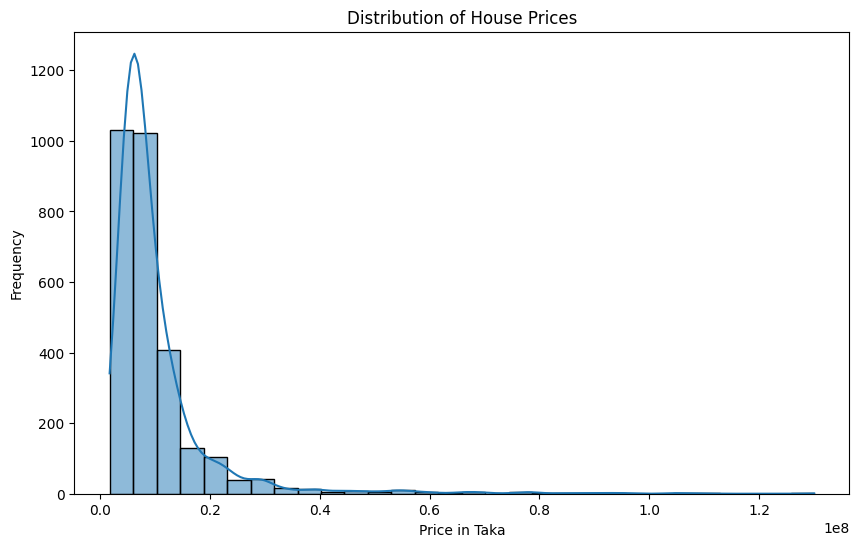

In [ ]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(real_state_house_price_dataframe['Price_in_taka'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price in Taka')
plt.ylabel('Frequency')
plt.show()

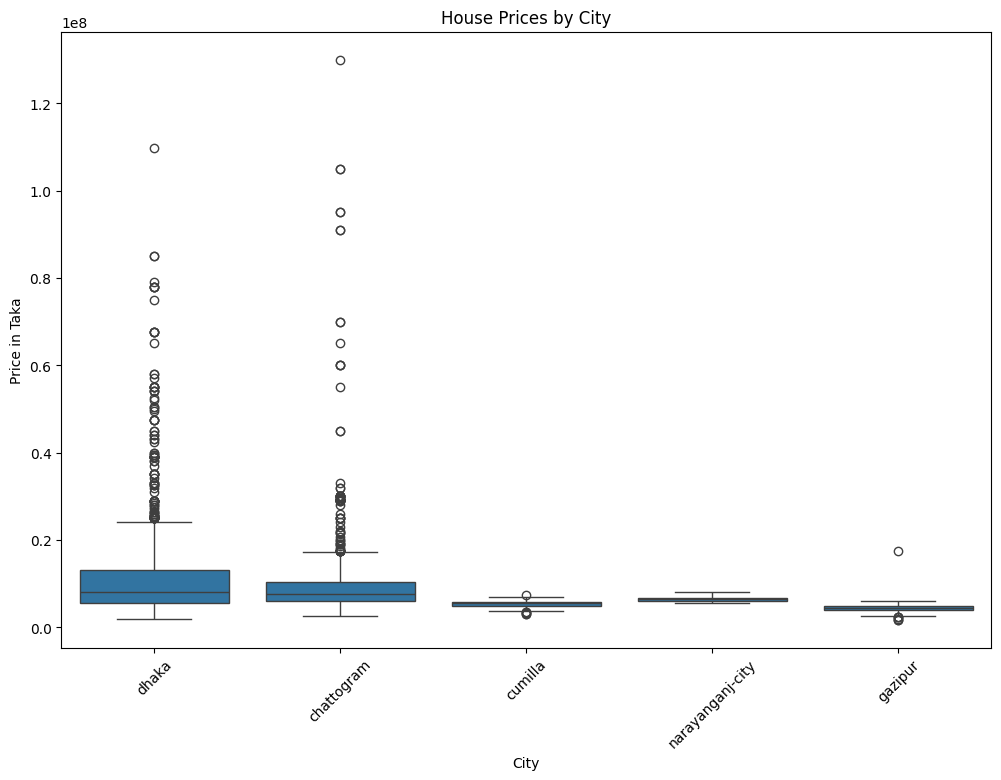

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Price_in_taka', data=real_state_house_price_dataframe)
plt.title('House Prices by City')
plt.xlabel('City')
plt.ylabel('Price in Taka')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Initialize LabelEncoder
label_encoder_city = LabelEncoder()
label_encoder_location = LabelEncoder()

# Apply LabelEncoder to City and Location columns for the entire dataset
real_state_house_price_dataframe['City'] = label_encoder_city.fit_transform(real_state_house_price_dataframe['City'])
real_state_house_price_dataframe['Location'] = label_encoder_location.fit_transform(real_state_house_price_dataframe['Location'])
real_state_house_price_dataframe['Floor_no'] = pd.to_numeric(real_state_house_price_dataframe['Floor_no'], errors='coerce')


# Define features (X) and target variable (Y)
X = real_state_house_price_dataframe[['Bedrooms', 'Bathrooms', 'Floor_area','Floor_no', 'City', 'Location']]
Y = real_state_house_price_dataframe['Price_in_taka']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



/tmp/ipython-input-12-1890580995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state_house_price_dataframe['City'] = label_encoder_city.fit_transform(real_state_house_price_dataframe['City'])
/tmp/ipython-input-12-1890580995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state_house_price_dataframe['Location'] = label_encoder_location.fit_transform(real_state_house_price_dataframe['Location'])
/tmp/ipython-input-12-1890580995.py:8: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
print(X)
print(Y)

      Bedrooms  Bathrooms  Floor_area  Floor_no  City  Location
0          3.0        4.0      1960.0       3.0     2       170
1          3.0        3.0      1705.0       1.0     2       214
2          3.0        3.0      1370.0       6.0     2       373
3          3.0        3.0      2125.0       4.0     2       101
4          3.0        3.0      2687.0       4.0     2       320
...        ...        ...         ...       ...   ...       ...
3860       3.0        3.0      1350.0       8.0     3       193
3861       2.0        2.0      1000.0       7.0     3       115
3862       3.0        3.0      1240.0       9.0     3       193
3863       3.0        3.0      1300.0       9.0     3       193
3864       3.0        3.0      1350.0       8.0     3       193

[2864 rows x 6 columns]
0       39000000.0
1       16900000.0
2       12500000.0
3       20000000.0
4       47500000.0
           ...    
3860     4500000.0
3861     4300000.0
3862     4960000.0
3863     5200000.0
3864     4500000.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2864, 6) (2291, 6) (573, 6)


In [ ]:
# Initialize and train the linear regression model
model = XGBRegressor()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)


In [ ]:
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[6000973.5 7009959.5 4434879.5 ... 2634325.5 3539796.  5649985. ]


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# To predict new data, you need to apply the same transformations to City and Location:
new_data = pd.DataFrame({
    'Bedrooms': [3],
    'Bathrooms': [3],
    'Floor_area': [1705],
     'Floor_no':[1],
    'City': ['dhaka'],  # Lowercase example for City only
    'Location': ['Lake Circus Road, Kalabagan']  # Case-sensitive Location
})

# Normalize the case (convert to lowercase) for City only
new_data['City'] = new_data['City'].str.lower()

# Apply LabelEncoder to the new data (use transform, not fit_transform)
try:
    new_data['City'] = label_encoder_city.transform(new_data['City'])  # Using transform
    new_data['Location'] = label_encoder_location.transform(new_data['Location'])  # Using transform
except ValueError as e:
    # Handle unseen label
    print("Error in label encoding:", e)
    # Here you can decide to assign a default value or handle it differently
    # For example, using `-1` for unseen categories
    new_data['City'] = -1
    new_data['Location'] = -1

# Make prediction on the new data
prediction = model.predict(new_data[['Bedrooms', 'Bathrooms', 'Floor_area', 'Floor_no', 'City', 'Location']])
print(f"Predicted House Price: {prediction[0]:,.2f} BDT")

Mean Squared Error: 7937962700630.497
Predicted House Price: 16,803,104.00 BDT


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9962801009138172
Mean Absolute Error :  406923.1207442165


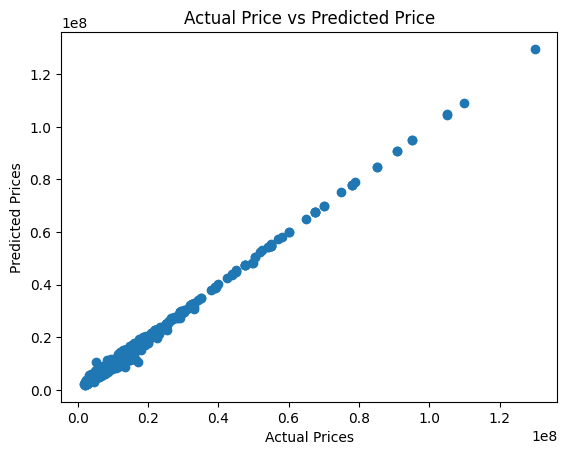

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8948370854327445
Mean Absolute Error :  1169720.8963787085


In [ ]:
model.save_model("real_state_house_price_bd_model.json")

## Data Preprocessing

The raw data underwent the following preprocessing steps:

1.  **Price Column Cleaning**: The currency symbol '৳' and commas were removed from the `Price_in_taka` column, and the data type was converted to numeric (float).
2.  **Handling Missing Values**: Rows with missing values in the `Bedrooms`, `Bathrooms`, `Floor_area`, and `Price_in_taka` columns were removed to ensure data quality for modeling.
3.  **Categorical Feature Encoding**: The categorical columns `City` and `Location` were transformed into numerical representations using `LabelEncoder`. This is necessary because machine learning models typically require numerical input.
4.  **Floor Number Conversion**: The `Floor_no` column was converted to a numerical data type. Any values that could not be converted were set to `NaN`.

# Task
Generate visualizations including a histogram of preprocessed house prices, a boxplot of preprocessed house prices by city, histograms and boxplots of original and transformed numerical features (Bedrooms, Bathrooms, Floor_area, Floor_no, City, Location), autocorrelation plots for original and preprocessed 'Price_in_taka', and SHAP summary plots for the XGBoost model.

## Visualize price distribution

### Subtask:
Generate a histogram to show the distribution of house prices in the preprocessed data.


**Reasoning**:
Generate a histogram to show the distribution of house prices in the preprocessed data.



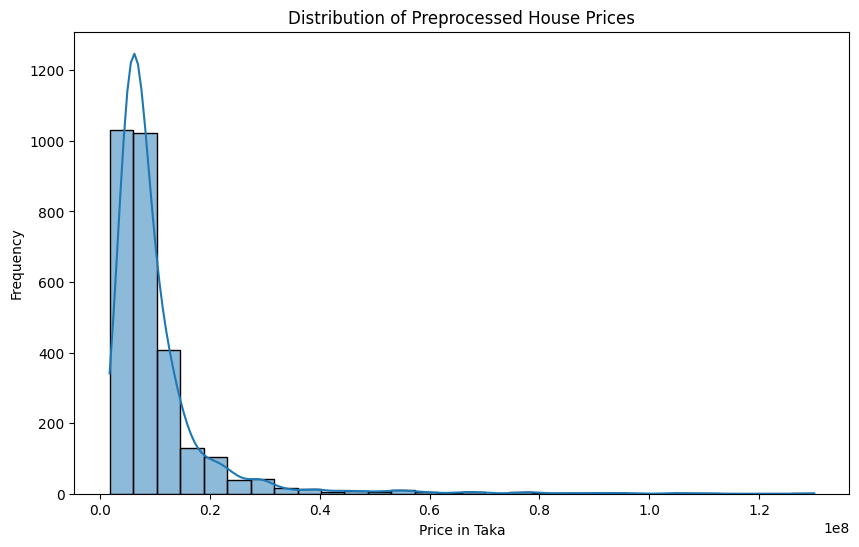

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(real_state_house_price_dataframe['Price_in_taka'], bins=30, kde=True)
plt.title('Distribution of Preprocessed House Prices')
plt.xlabel('Price in Taka')
plt.ylabel('Frequency')
plt.show()

## Visualize price by city

### Subtask:
Generate a boxplot to show the distribution of house prices across different cities in the preprocessed data.


**Reasoning**:
Create a boxplot to visualize the distribution of house prices across different cities using the preprocessed data.



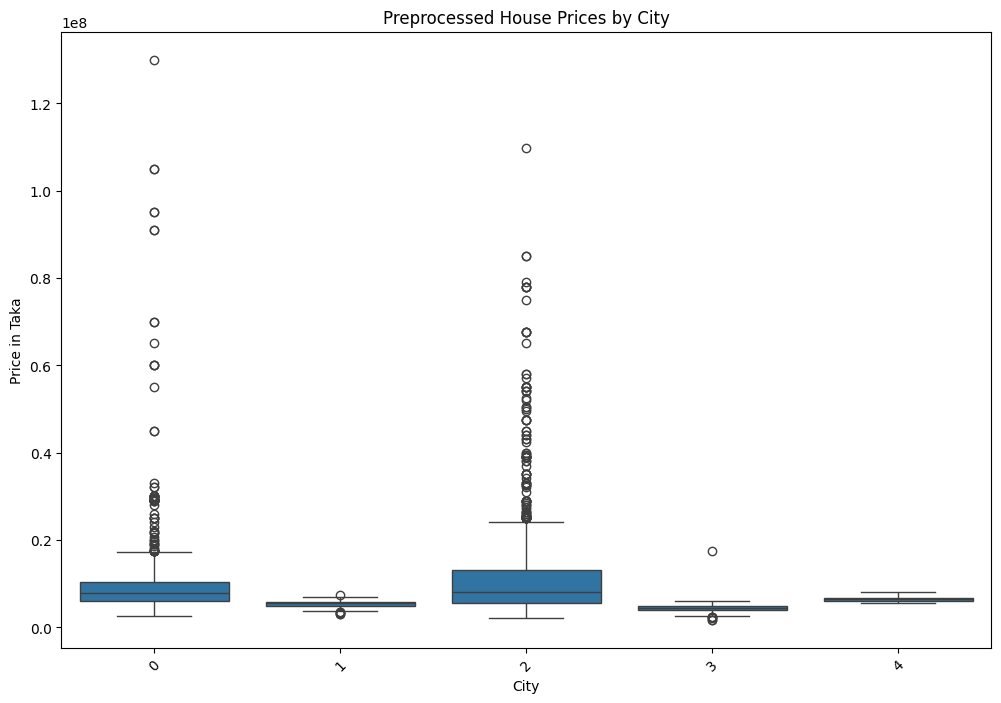

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Price_in_taka', data=real_state_house_price_dataframe)
plt.title('Preprocessed House Prices by City')
plt.xlabel('City')
plt.ylabel('Price in Taka')
plt.xticks(rotation=45)
plt.show()

## Visualize original data distributions

### Subtask:
Generate histograms and boxplots for key numerical columns in the original dataset (Bedrooms, Bathrooms, Floor_area).


**Reasoning**:
Generate histograms and boxplots for the specified numerical columns in the original dataframe.



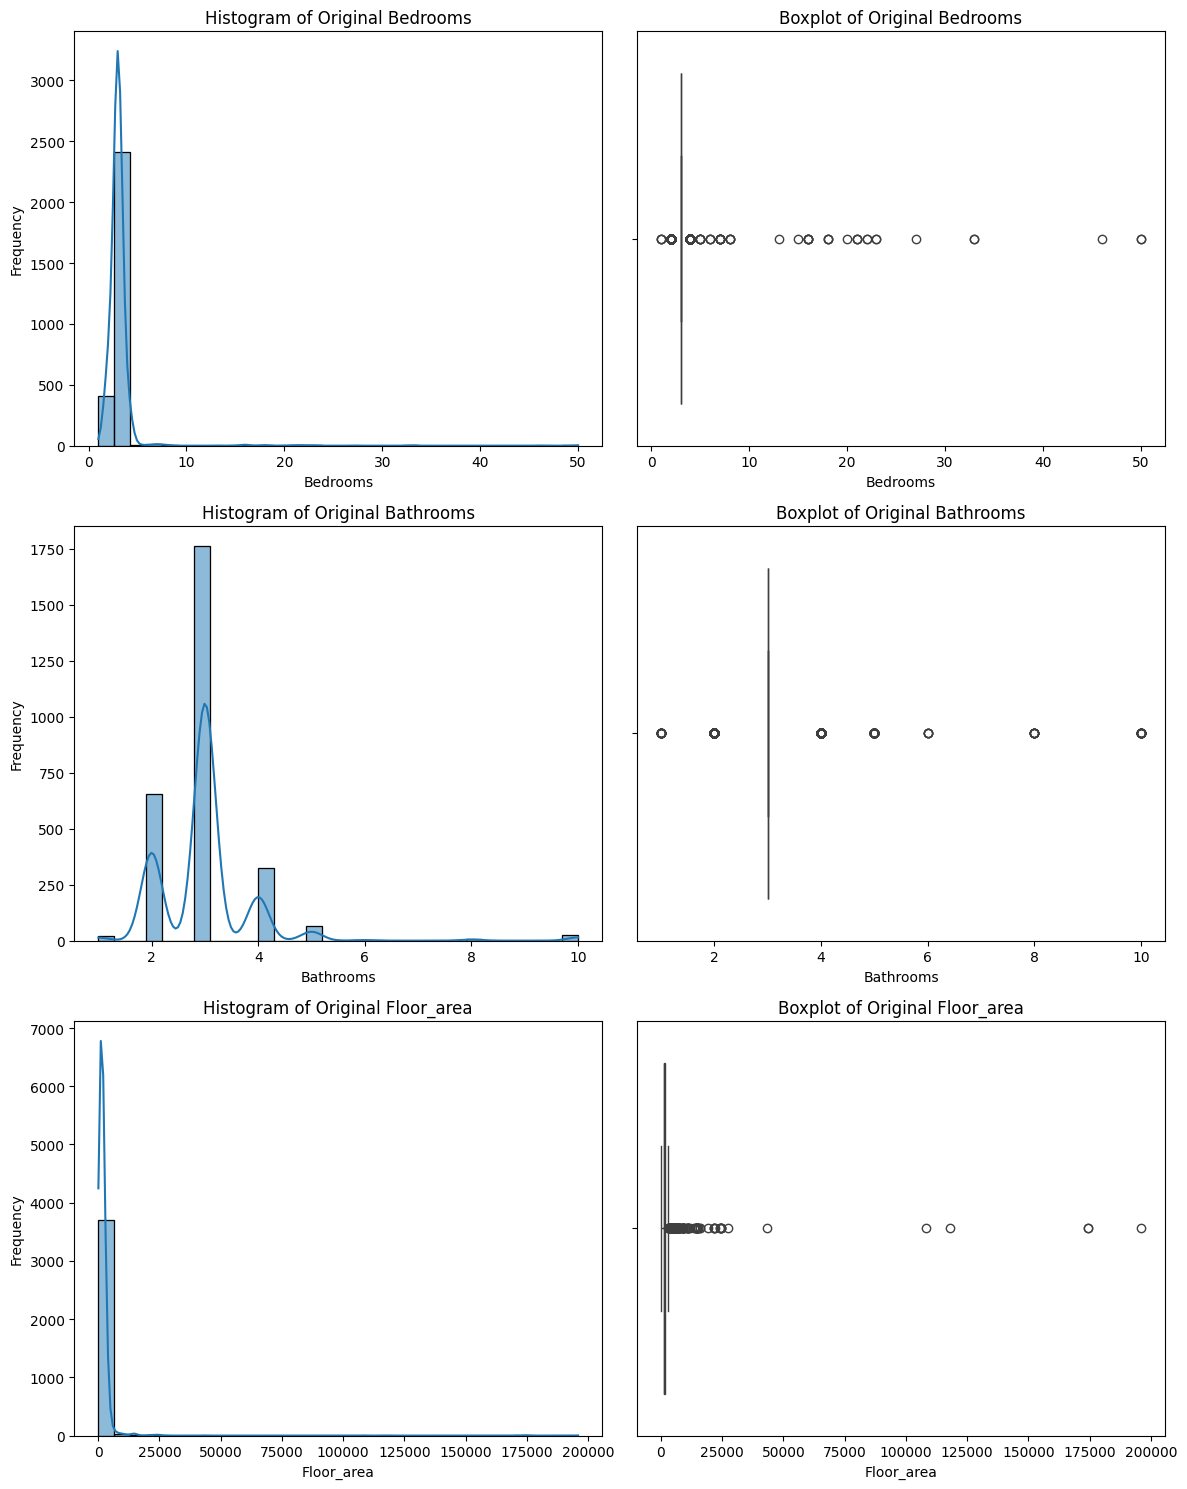

In [ ]:
# Load the original data again to get the original numerical columns
original_df = pd.read_csv("house_price_bd.csv")

# Convert 'Price_in_taka' to numeric for potential use in other plots later
original_df['Price_in_taka'] = original_df['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True).astype(float)


# Define the numerical columns to visualize from the original dataset
numerical_cols = ['Bedrooms', 'Bathrooms', 'Floor_area']

# Create a new figure for the plots
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 5 * len(numerical_cols)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and generate histogram and boxplot
for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(original_df[col].dropna(), bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of Original {col}')
    axes[2*i].set_xlabel(col)
    axes[2*i].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=original_df[col].dropna(), ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Boxplot of Original {col}')
    axes[2*i+1].set_xlabel(col)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Visualize transformed data distributions

### Subtask:
Generate histograms and boxplots for the transformed numerical features (Bedrooms, Bathrooms, Floor_area, Floor_no, City, Location) after preprocessing and encoding.


**Reasoning**:
Generate histograms and boxplots for the transformed numerical features as requested in the subtask.



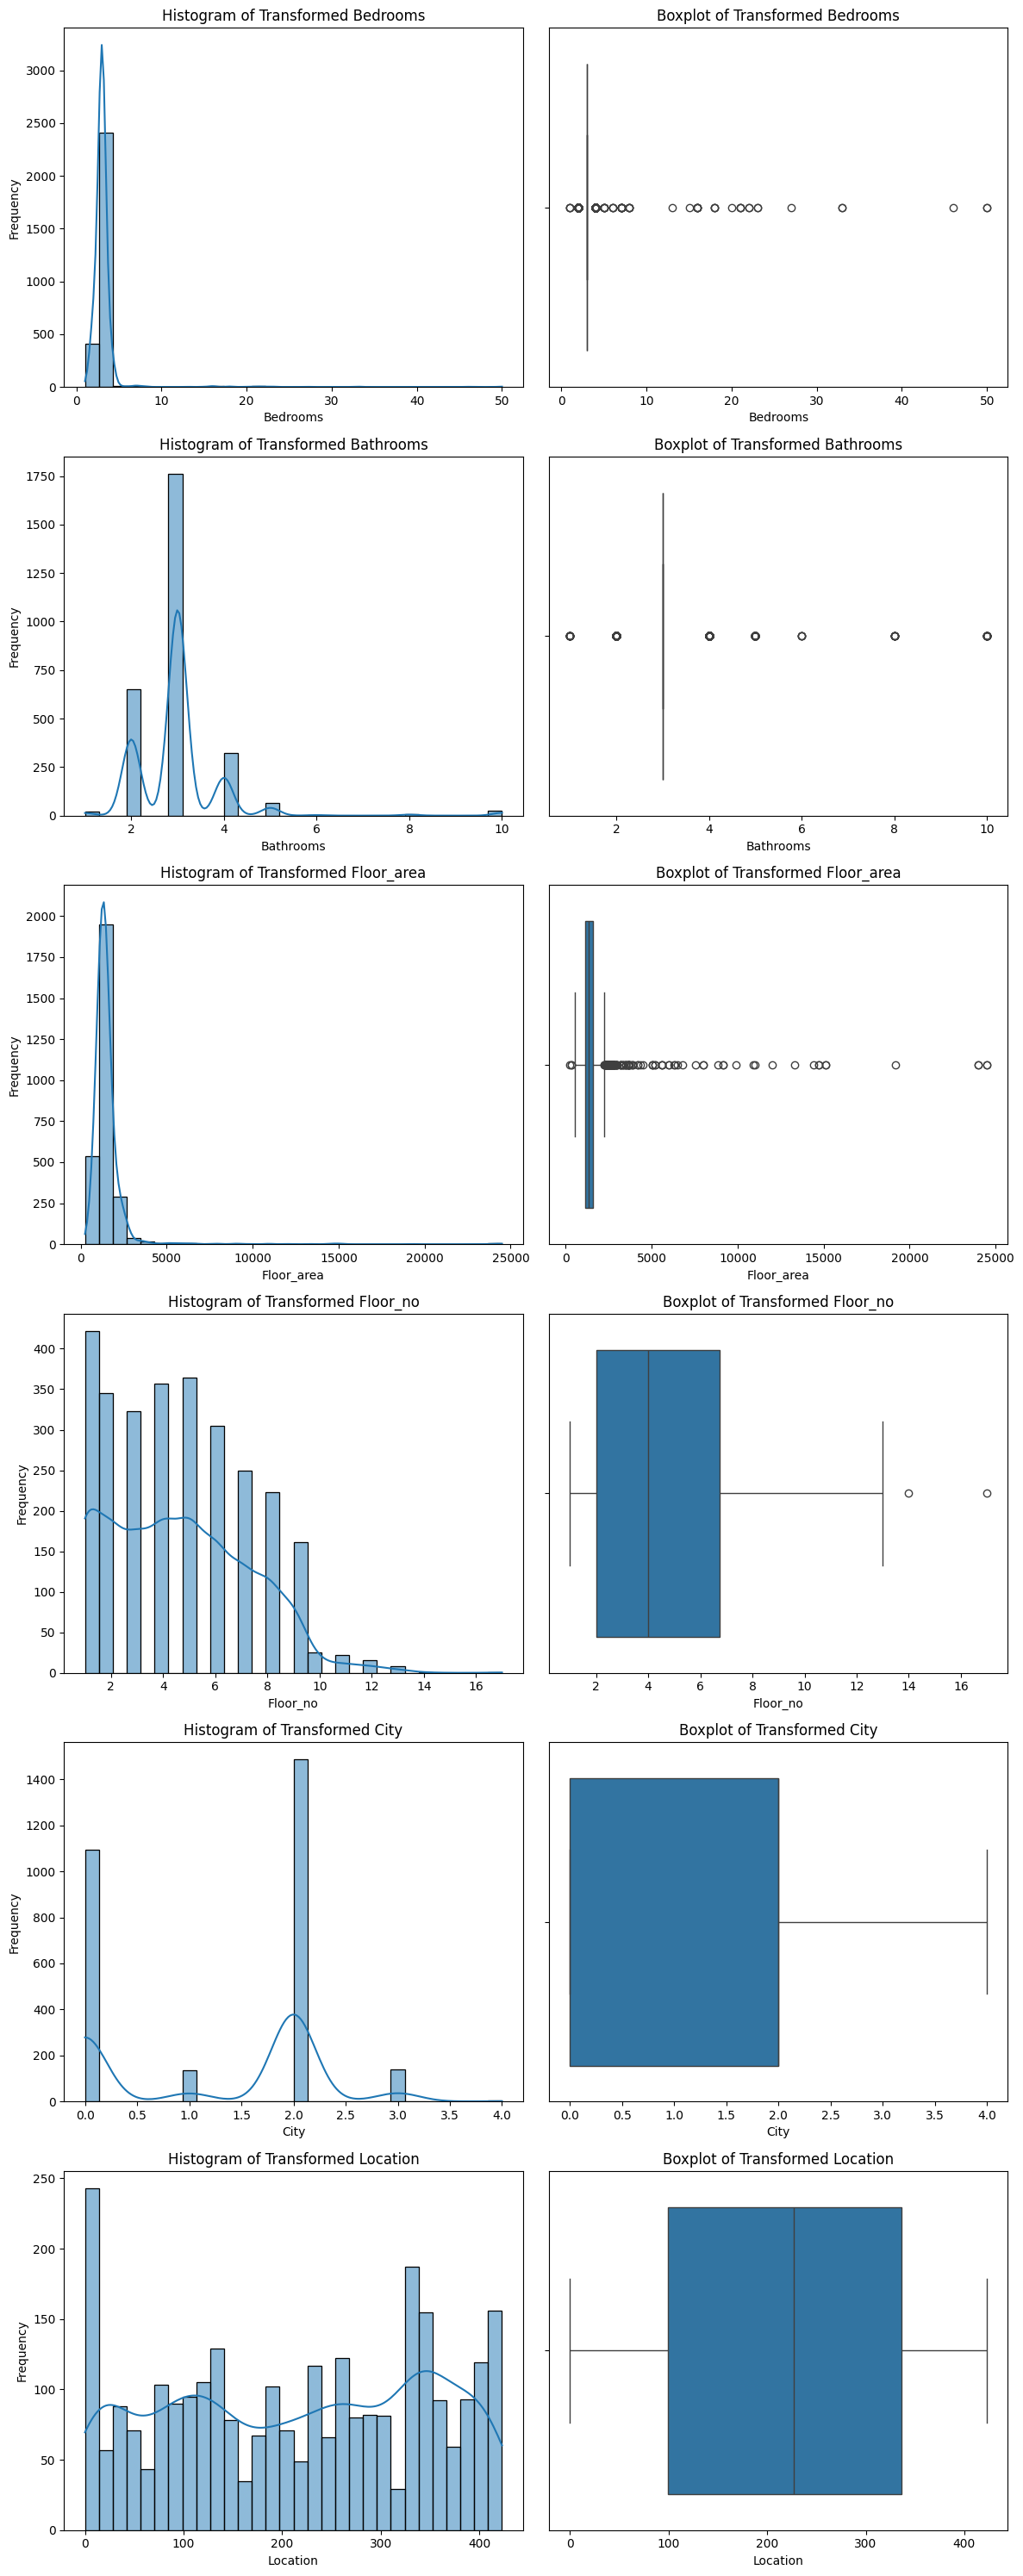

In [ ]:
# Define a list of the transformed numerical features to visualize
transformed_numerical_features = ['Bedrooms', 'Bathrooms', 'Floor_area', 'Floor_no', 'City', 'Location']

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(transformed_numerical_features), 2, figsize=(12, 5 * len(transformed_numerical_features)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the list of transformed features and generate histograms and boxplots
for i, col in enumerate(transformed_numerical_features):
    # Histogram
    sns.histplot(real_state_house_price_dataframe[col].dropna(), bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of Transformed {col}')
    axes[2*i].set_xlabel(col)
    axes[2*i].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=real_state_house_price_dataframe[col].dropna(), ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Boxplot of Transformed {col}')
    axes[2*i+1].set_xlabel(col)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

## Calculate and visualize autocorrelation

### Subtask:
Calculate and visualize the autocorrelation of the 'Price_in_taka' column in both the original and preprocessed data (if applicable and meaningful for this dataset).


**Reasoning**:
Import the necessary function for plotting autocorrelation and generate the autocorrelation plots for the original and preprocessed 'Price_in_taka' column.



<Figure size 1000x600 with 0 Axes>

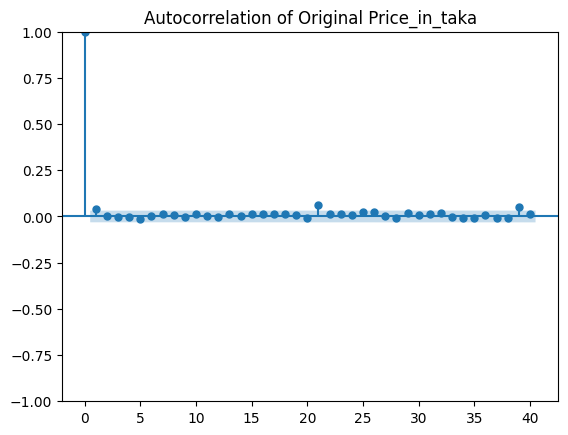

<Figure size 1000x600 with 0 Axes>

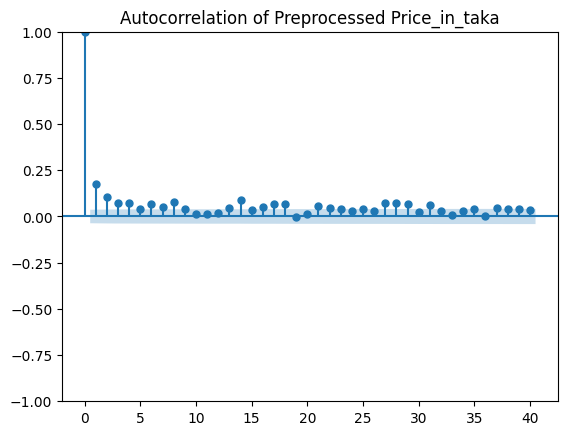

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Generate autocorrelation plot for the original 'Price_in_taka'
plt.figure(figsize=(10, 6))
plot_acf(original_df['Price_in_taka'].dropna(), lags=40, title='Autocorrelation of Original Price_in_taka')
plt.show()

# Generate autocorrelation plot for the preprocessed 'Price_in_taka'
plt.figure(figsize=(10, 6))
plot_acf(real_state_house_price_dataframe['Price_in_taka'].dropna(), lags=40, title='Autocorrelation of Preprocessed Price_in_taka')
plt.show()

## Calculate shap values

### Subtask:
Calculate SHAP values for the trained XGBoost model to understand the contribution of each feature to the predictions.


**Reasoning**:
Calculate SHAP values for the trained XGBoost model to understand the contribution of each feature to the predictions.



In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test dataset
shap_values = explainer(X_test)

# Store the calculated SHAP values in a variable (already done in the previous step)

**Reasoning**:
Visualize the SHAP values using a summary plot to understand the overall feature importance and impact.



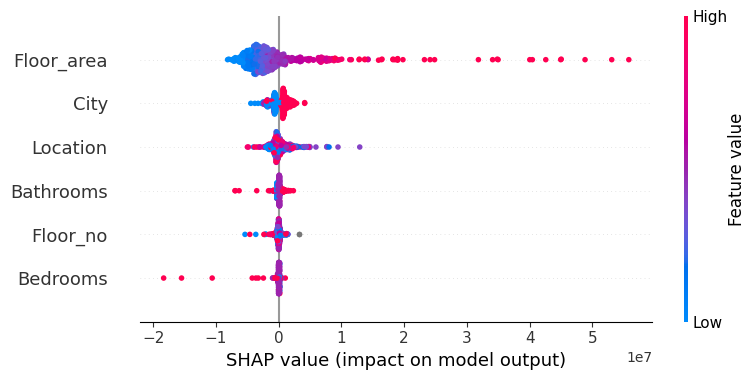

In [ ]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

## Visualize shap summary

### Subtask:
Generate a SHAP summary plot to visualize the average impact of each feature on the model output magnitude.


**Reasoning**:
Generate the SHAP summary plot using the calculated SHAP values and the test data features.



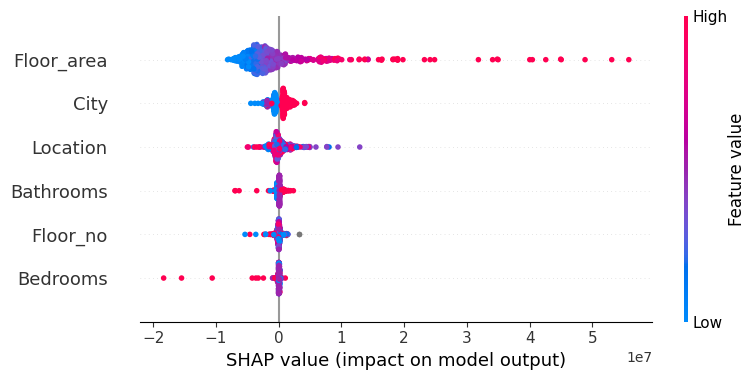

In [ ]:
shap.summary_plot(shap_values, X_test)

## Summary:

### Data Analysis Key Findings

*   The distribution of preprocessed house prices was visualized using a histogram.
*   A boxplot was generated showing the distribution of preprocessed house prices across different cities.
*   Histograms and boxplots were created for the original numerical features: 'Bedrooms', 'Bathrooms', and 'Floor\_area'.
*   Histograms and boxplots were created for the transformed numerical features: 'Bedrooms', 'Bathrooms', 'Floor\_area', 'Floor\_no', 'City', and 'Location'.
*   Autocorrelation plots for both the original and preprocessed 'Price\_in\_taka' were successfully generated.
*   SHAP values were calculated for the test dataset using the trained XGBoost model.
*   A SHAP summary plot was generated to visualize feature importance and their impact on model predictions.

### Insights or Next Steps

*   Analyze the SHAP summary plot to identify the features with the largest impact on house prices and understand the direction of their influence.
*   Investigate the autocorrelation plots to understand any potential temporal dependencies in the price data, although this is less likely for a cross-sectional dataset unless there's a time-series element in the data collection.


In [ ]:
 can help with that! Let's go through the diagrams one by one:

Distribution of Preprocessed House Prices (Histogram): This histogram shows how frequently different price ranges occur in your preprocessed dataset. The shape of the histogram can tell you if the prices are clustered around a certain value, if they are spread out, or if there are any outliers.

Preprocessed House Prices by City (Boxplot): This boxplot compares the distribution of house prices across different cities. For each city, the box represents the interquartile range (where the middle 50% of prices lie), the line inside the box is the median price, and the "whiskers" extend to the minimum and maximum prices within a certain range. Outliers are shown as individual points. This plot helps you see how prices vary from city to city and identify potential differences in price ranges and variability.

Histograms and Boxplots of Original Numerical Features (Bedrooms, Bathrooms, Floor_area): These plots show the distributions of the original, untransformed numerical features. The histograms show the frequency of different values for each feature, while the boxplots highlight the central tendency, spread, and potential outliers in the original data. This helps you understand the initial characteristics of these features before any preprocessing.

Histograms and Boxplots of Transformed Numerical Features (Bedrooms, Bathrooms, Floor_area, Floor_no, City, Location): These plots show the distributions of the numerical features after preprocessing and encoding. Comparing these to the original data plots (where applicable) can show the effect of transformations like handling missing values or encoding categorical features. For 'City' and 'Location', the boxplots will show the distribution of their encoded numerical representations.

Autocorrelation of Original and Preprocessed Price_in_taka: Autocorrelation plots show the correlation of a time series with its own past values at different time lags. In this case, since your data doesn't appear to be a time series with a clear temporal order, the autocorrelation plots might not be as informative in terms of time dependencies. However, they can still reveal if there are any patterns or dependencies in the order the data appears in the dataset. A significant spike at a certain lag indicates a correlation with values at that lag.

SHAP Summary Plot: This plot is generated after calculating SHAP (SHapley Additive exPlanations) values for your XGBoost model. SHAP values help explain how each feature contributes to the model's prediction for each individual data point. The summary plot visualizes the impact of each feature across the entire dataset:

Vertical axis: Lists the features in order of their overall importance (based on the magnitude of their SHAP values).
Horizontal axis: Represents the SHAP value, which indicates the impact on the model output.
Color: Represents the feature value (e.g., high or low).
Each dot: Represents a single data point from the test set.
This plot allows you to see which features have the biggest impact on the model's predictions and whether high or low values of a feature tend to drive the prediction higher or lower.

Let me know if you'd like a more detailed explanation of any specific diagram!